In [3]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Raw Data

In [6]:
#Data from Fangraphs: https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=y&type=8&season=2021&month=0&season1=2021&ind=0&team=&rost=&age=&filter=&players=
a = pd.read_csv('batter2021f.csv')
#Data from Baseball Savant: https://baseballsavant.mlb.com/leaderboard/statcast?type=batter&year=2021&position=&team=&min=200
#We are only going to consider batters with at least 200 ABs
b = pd.read_csv('exit_velocity.csv')
print(a.head())
print(b.head())

             Name   Team  BABIP  GB/FB     LD%     GB%     FB% IFFB% HR/FB  \
0    Tommy Hunter    NYM    1.0    0.0  100.0%    0.0%    0.0%  0.0%  0.0%   
1     Daniel Bard    COL    1.0    0.0  100.0%    0.0%    0.0%  0.0%  0.0%   
2  Connor Overton  - - -    1.0    0.0    0.0%    0.0%  100.0%  0.0%  0.0%   
3   Jose Quintana  - - -    1.0    1.0    0.0%  100.0%    0.0%  0.0%  0.0%   
4       Josh Lowe    TBR    1.0    1.0    0.0%  100.0%    0.0%  0.0%  0.0%   

   IFH  ... BUH  BUH%   Pull% Cent%   Oppo%   Soft%    Med%   Hard% AB  \
0    0  ...   0  0.0%  100.0%  0.0%    0.0%    0.0%    0.0%  100.0%  1   
1    0  ...   0  0.0%  100.0%  0.0%    0.0%    0.0%    0.0%  100.0%  1   
2    0  ...   0  0.0%    0.0%  0.0%  100.0%  100.0%    0.0%    0.0%  1   
3    0  ...   0  0.0%    0.0%  0.0%  100.0%    0.0%  100.0%    0.0%  1   
4    1  ...   0  0.0%    0.0%  0.0%  100.0%  100.0%    0.0%    0.0%  1   

   playerid  
0      1157  
1      7115  
2     18376  
3     11423  
4     19953  

[

# Data Processing

In [7]:
names = []
for i in b.index:
    names.append(b.loc[i][' first_name'][1:] + " " + b.loc[i]['last_name'])
b['Name'] = names
d = []
for i in a.index:
    if a.loc[i]['Name'] not in names:
        d.append(i)
a = a.drop(d).reset_index(drop = True)
a = a.drop(261)
a = a[['Name', 'BABIP']].set_index('Name')
b = b[['Name', 'avg_hit_speed']].set_index('Name')
total = a.join(b)
total

,BABIP,avg_hit_speed
Name,,
Bryce Harper,0.359,92.5
Juan Soto,0.332,93.0
Vladimir Guerrero Jr.,0.313,95.1
Ronald Acuna Jr.,0.311,93.8
Brandon Belt,0.309,89.2
...,...,...
Kevin Newman,0.236,85.3
Joe Panik,0.230,86.5
Cody Bellinger,0.196,89.3


# Linear Regression Plotting

Text(0, 0.5, 'BABIP')

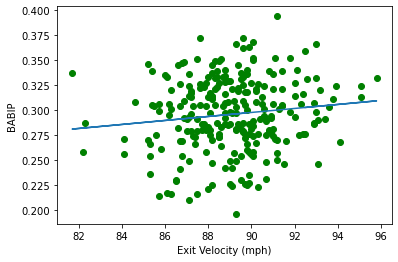

In [8]:
reg = LinearRegression().fit(np.array(total['avg_hit_speed']).reshape((-1,1)), np.array(total['BABIP']).reshape((-1,1)))
p = reg.predict(np.array(total['avg_hit_speed']).reshape((-1,1)))
plt.plot(total['avg_hit_speed'],total['BABIP'], 'go')
plt.plot(total['avg_hit_speed'], p)
plt.xlabel("Exit Velocity (mph)")
plt.ylabel("BABIP")